In [280]:
import geopandas as gpd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from matplotlib import pyplot as plt

In [281]:
df = gpd.read_file('data_merged\\full_join.geojson')

In [282]:
df = df.assign(
    density = df['inhabitants'] / df['area_sqkm'],
    crime_and_nuisance = df['Total felonies'] + df['Total nuisance registrations']
)

In [283]:
df = pd.DataFrame(df[['sport_building_count',
                    'distance_from_centre_km',
                    'green_score',
                    'livability_score',
                    'jobs_count',
                    'proximity_score',
                    'density',
                    'crime_and_nuisance',
                    'price_2022']])

In [284]:
df['crime_and_nuisance'] = df['crime_and_nuisance'].fillna(value=df['crime_and_nuisance'].mean())

In [285]:
df = df.dropna()

In [286]:
X = df.drop('price_2022', axis=1)
y = df[['price_2022']]

In [287]:
colls = X.columns

In [288]:
X = normalize(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
params = {
    'n_estimators': [x for x in range(1, 20)],
    'max_depth': [x for x in range(1, 20)]
}

In [291]:
model = RandomForestRegressor(random_state=42, criterion='squared_error')

In [292]:
searcher = GridSearchCV(model, param_grid=params, scoring=r2_score, n_jobs=4, verbose=2, refit=True)

In [293]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 361 candidates, totalling 1805 fits


c:\anaconda\envs\st\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan na

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring=<function r2_score at 0x00000250F6228C10>, verbose=2)

In [294]:
model = searcher.best_estimator_

In [295]:
searcher.best_params_

{'max_depth': 1, 'n_estimators': 1}

In [296]:
y_pred = model.predict(X_test)

In [297]:
r2_score(y_test, y_pred)

0.4224563604295214

In [298]:
mean_squared_error(y_test, y_pred)

22373699846.212994

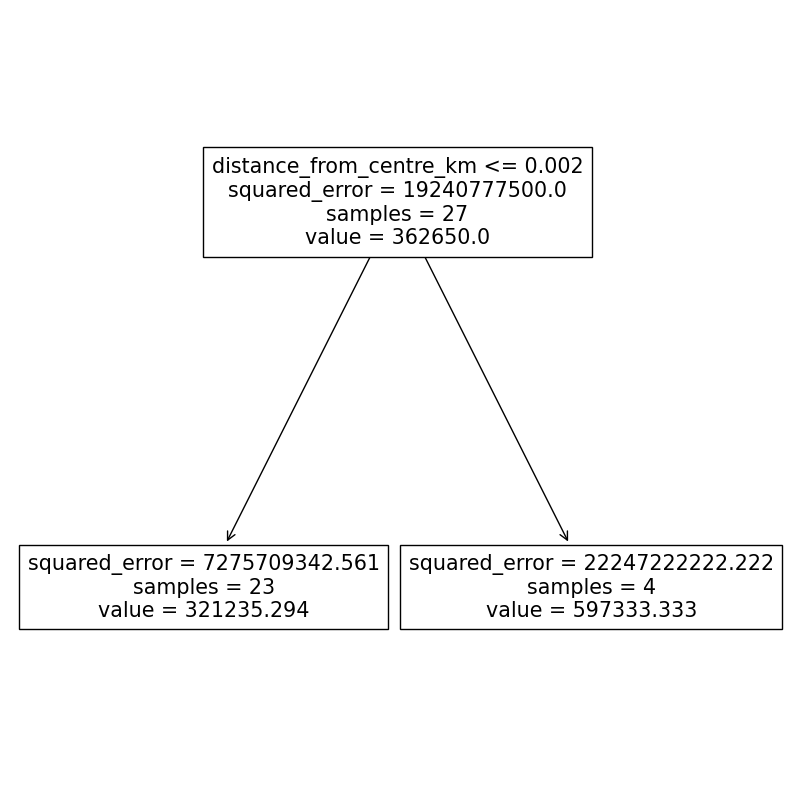

In [299]:
plt.figure(figsize=(10,10))
_ = tree.plot_tree(model.estimators_[0], feature_names=colls, filled=False)